# AP Calculus AB Scoring Statistics Analysis

This notebook contains analyses performed on the AP Calculus AB scoring statistics, including trend analysis, difficulty analysis, correlation analysis, and more.

## Data Loading and Overview

In [1]:
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scikit-learn


zsh:1: parse error near `-m'
zsh:1: parse error near `-m'


In [2]:
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])


0

In [3]:
subprocess.check_call([sys.executable, "-m", "pip", "install", "statsmodels"])


0

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the dataset
data_path = 'concatenated_ap_calculus_ab_scoring_statistics.csv'
data = pd.read_csv(data_path)
data.head()
    

,Year,Question,Mean,Standard Deviation,Number of Possible Points
0,2023,1,3.79,2.57,9
1,2023,2,4.62,3.14,9
2,2023,3,2.07,2.28,9
3,2023,4,2.70,2.17,9
4,2023,5,4.46,3.26,9


## Trend Analysis

The trend analysis examines how the average scores for each question have changed over the years.

We'll plot the mean scores for each question across the years to visualize any trends. This will help us understand if questions are becoming easier or harder over time or if certain patterns emerge.

We'll begin by creating a line plot where each line represents a question, the x-axis represents the years, and the y-axis represents the mean scores.

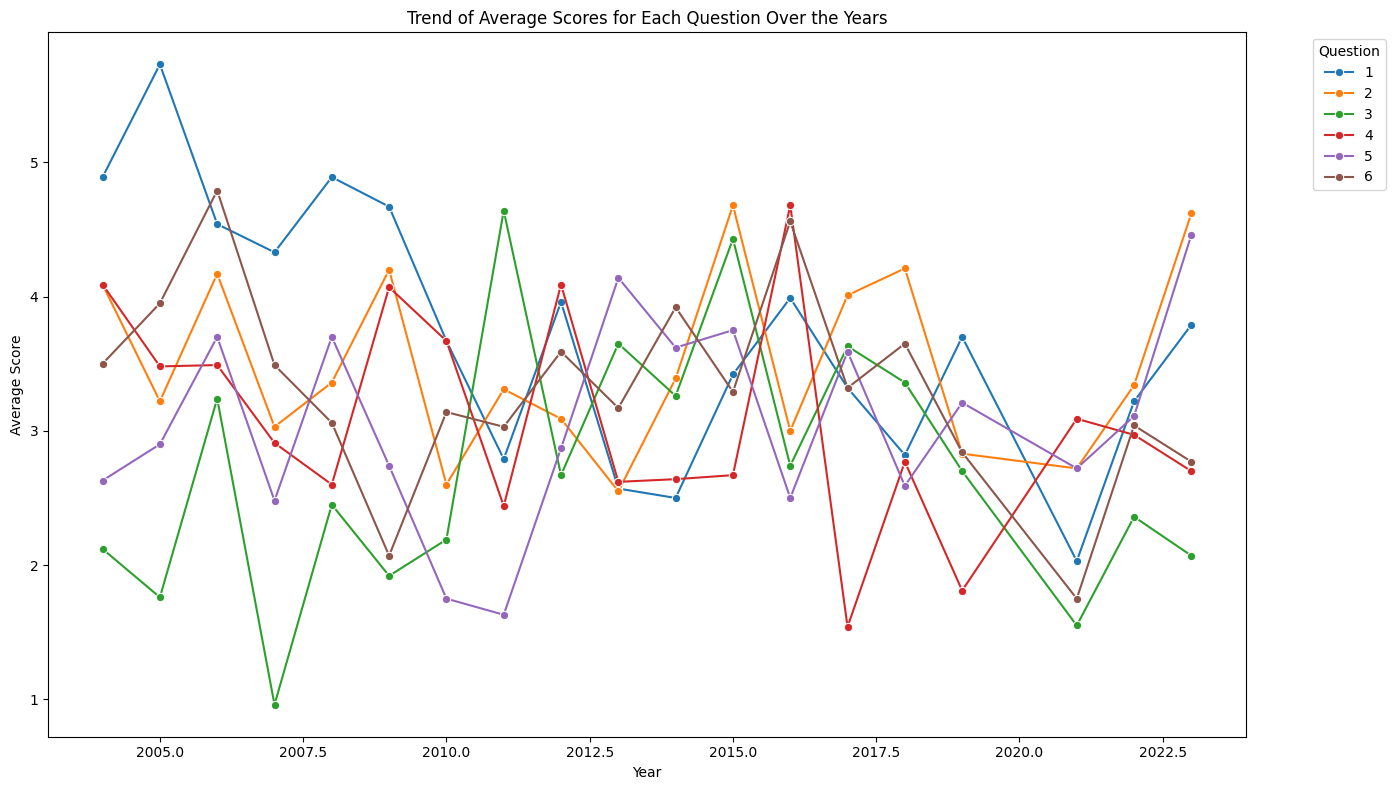

In [5]:

# Plotting the trend of mean scores for each question over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='Year', y='Mean', hue='Question', marker='o', palette='tab10')
plt.title('Trend of Average Scores for Each Question Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
    

The line plot above illustrates the trend of average scores for each question over the years. Each line represents a different question, allowing us to observe how the average scores have evolved.

From the plot, we can observe several trends:

- Some questions show fluctuations in average scores from year to year, indicating varying levels of difficulty or student preparedness.
- There may be questions with a general upward or downward trend, suggesting changes in difficulty, teaching methods, or student familiarity with the topics over time.
- The spread between the highest and lowest average scores for questions in a given year could indicate the range of question difficulties.

Next, we can proceed to the Difficulty Analysis to assess the relative difficulty of each question within a year, based on mean scores and standard deviations. We'll then look at Question Difficulty Trends to analyze if certain questions are consistently more challenging over the years. Finally, we'll conduct a Correlation Analysis to investigate correlations between the scores of different questions.

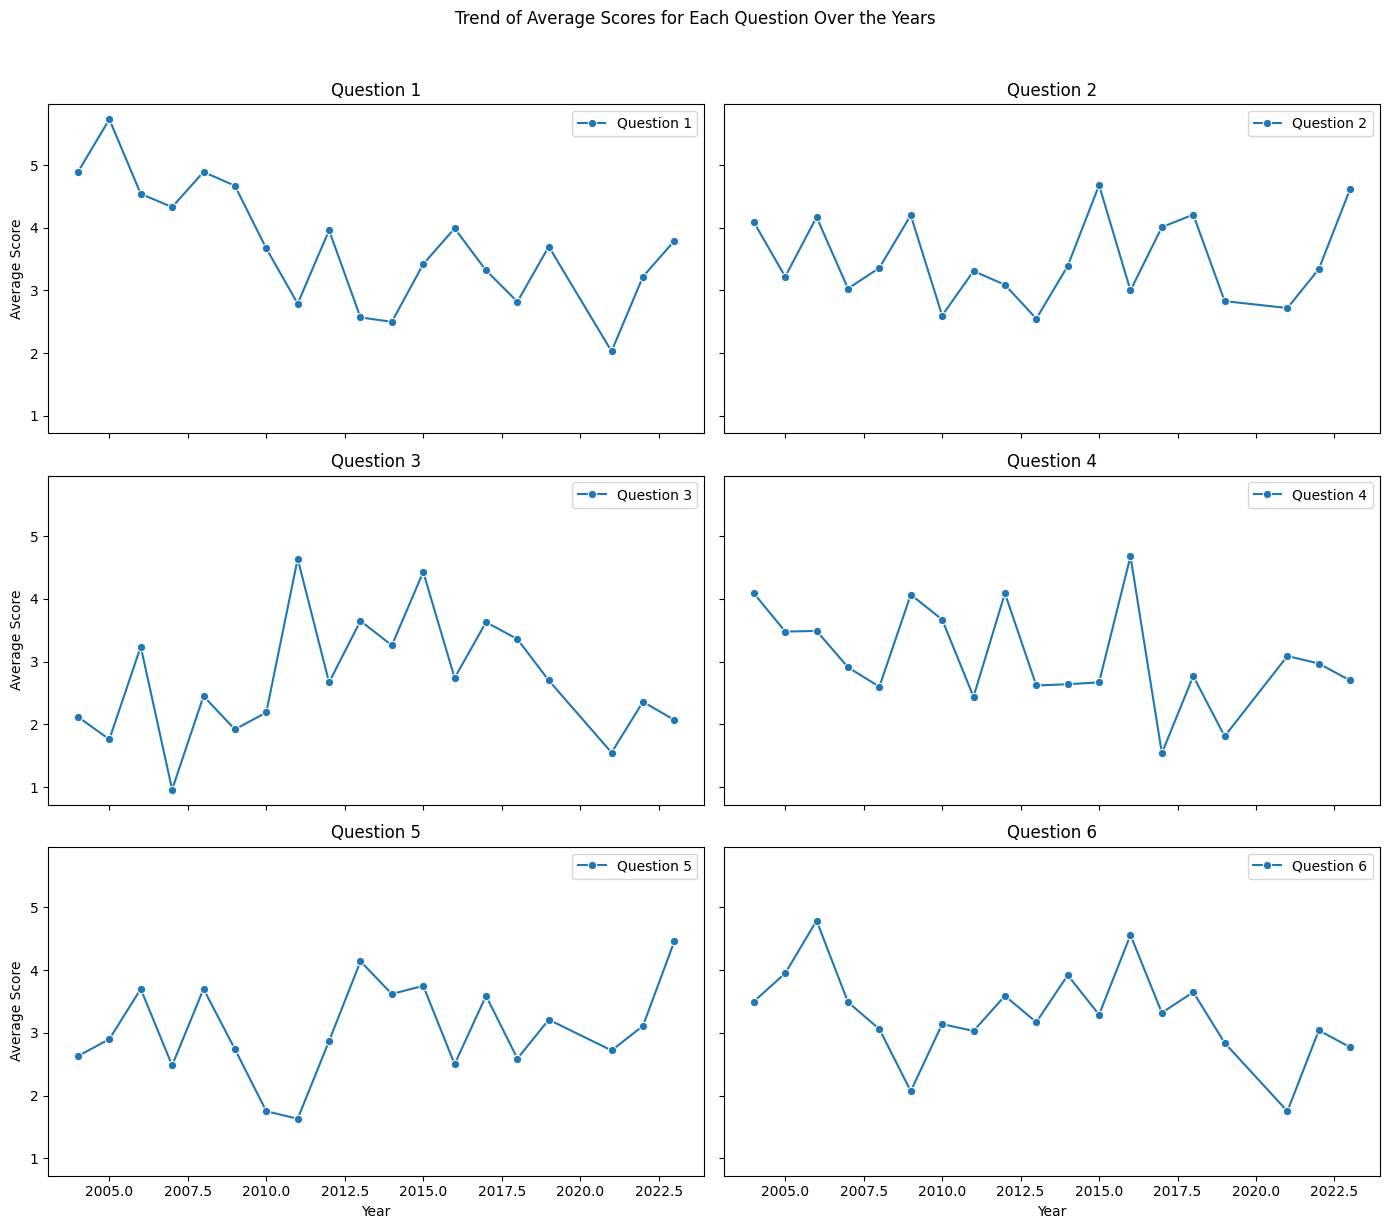

In [6]:
# Plotting the trend of mean scores for each question over the years
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)

for ax, question in zip(axes.flatten(), data['Question'].unique()):
    sns.lineplot(data=data[data['Question'] == question], x='Year', y='Mean', marker='o', ax=ax)
    ax.set_title(f'Question {question}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Score')
    ax.legend([f'Question {question}'], loc='upper right')

plt.suptitle('Trend of Average Scores for Each Question Over the Years', y=1.02)
plt.tight_layout()
plt.show()


## Difficulty Analysis

This section assesses the relative difficulty of each question within a year, based on their mean scores and standard deviations.

For the Difficulty Analysis, we'll assess the relative difficulty of each question within a year based on their mean scores and standard deviations. Lower mean scores may indicate higher difficulty, and higher standard deviations suggest a wider spread of student performance on that question.

We'll create two visualizations for each year:

1. A bar plot showing the mean scores for each question, allowing us to quickly identify which questions were harder or easier based on the lower average scores.
2. A bar plot showing the standard deviations for each question, providing insight into the variability of scores and potentially the clarity or ambiguity of the question.

Given the potentially large number of years and questions, we may need to focus on a subset for clarity in visualization. Let's start by examining the most recent year in the dataset and proceed from there.

/var/folders/n5/cdb5c7816hl467kc0f6yhd700000gn/T/ipykernel_14130/3586095916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=data_recent_year, x='Question', y='Mean', palette='coolwarm')
/var/folders/n5/cdb5c7816hl467kc0f6yhd700000gn/T/ipykernel_14130/3586095916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=data_recent_year, x='Question', y='Standard Deviation', palette='coolwarm')


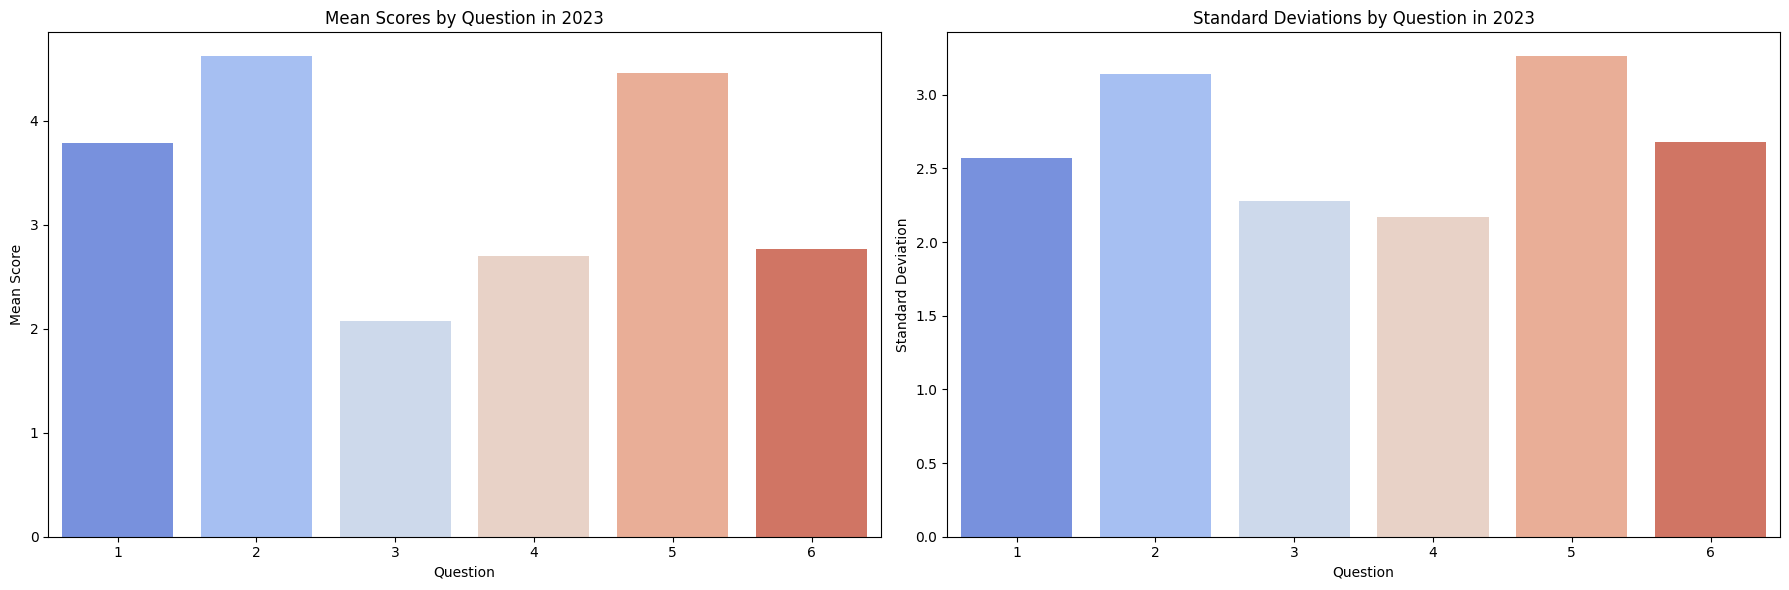

In [7]:

# Difficulty analysis for the most recent year
most_recent_year = data['Year'].max()
data_recent_year = data[data['Year'] == most_recent_year]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(ax=axes[0], data=data_recent_year, x='Question', y='Mean', palette='coolwarm')
axes[0].set_title(f'Mean Scores by Question in {most_recent_year}')
axes[0].set_xlabel('Question')
axes[0].set_ylabel('Mean Score')

sns.barplot(ax=axes[1], data=data_recent_year, x='Question', y='Standard Deviation', palette='coolwarm')
axes[1].set_title(f'Standard Deviations by Question in {most_recent_year}')
axes[1].set_xlabel('Question')
axes[1].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()
    

The visualizations above show the mean scores and standard deviations for each question in the most recent year, providing insights into their relative difficulty:

- **Mean Scores by Question**: The bar plot on the left displays the average scores for each question. Questions with lower average scores can be considered more challenging for students, as they scored less on these questions on average.

- **Standard Deviations by Question**: The bar plot on the right shows the standard deviations for each question, indicating the variability in scores. Higher standard deviations suggest a wider spread of scores, which could mean the question was interpreted differently by students or was challenging to a varied extent.

Didn't like this, so decided to run some boxplots

create box plots for each question to visualize the distribution of mean scores over the years. Box plots will allow us to see the median, quartiles, and any outliers for the average scores of each question, providing a clear picture of how the scores have varied over time.

Let's create a series of box plots, one for each question, showing the distribution of mean scores across all the years in the dataset.

/var/folders/n5/cdb5c7816hl467kc0f6yhd700000gn/T/ipykernel_14130/472150664.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Question', y='Mean', palette='Spectral')


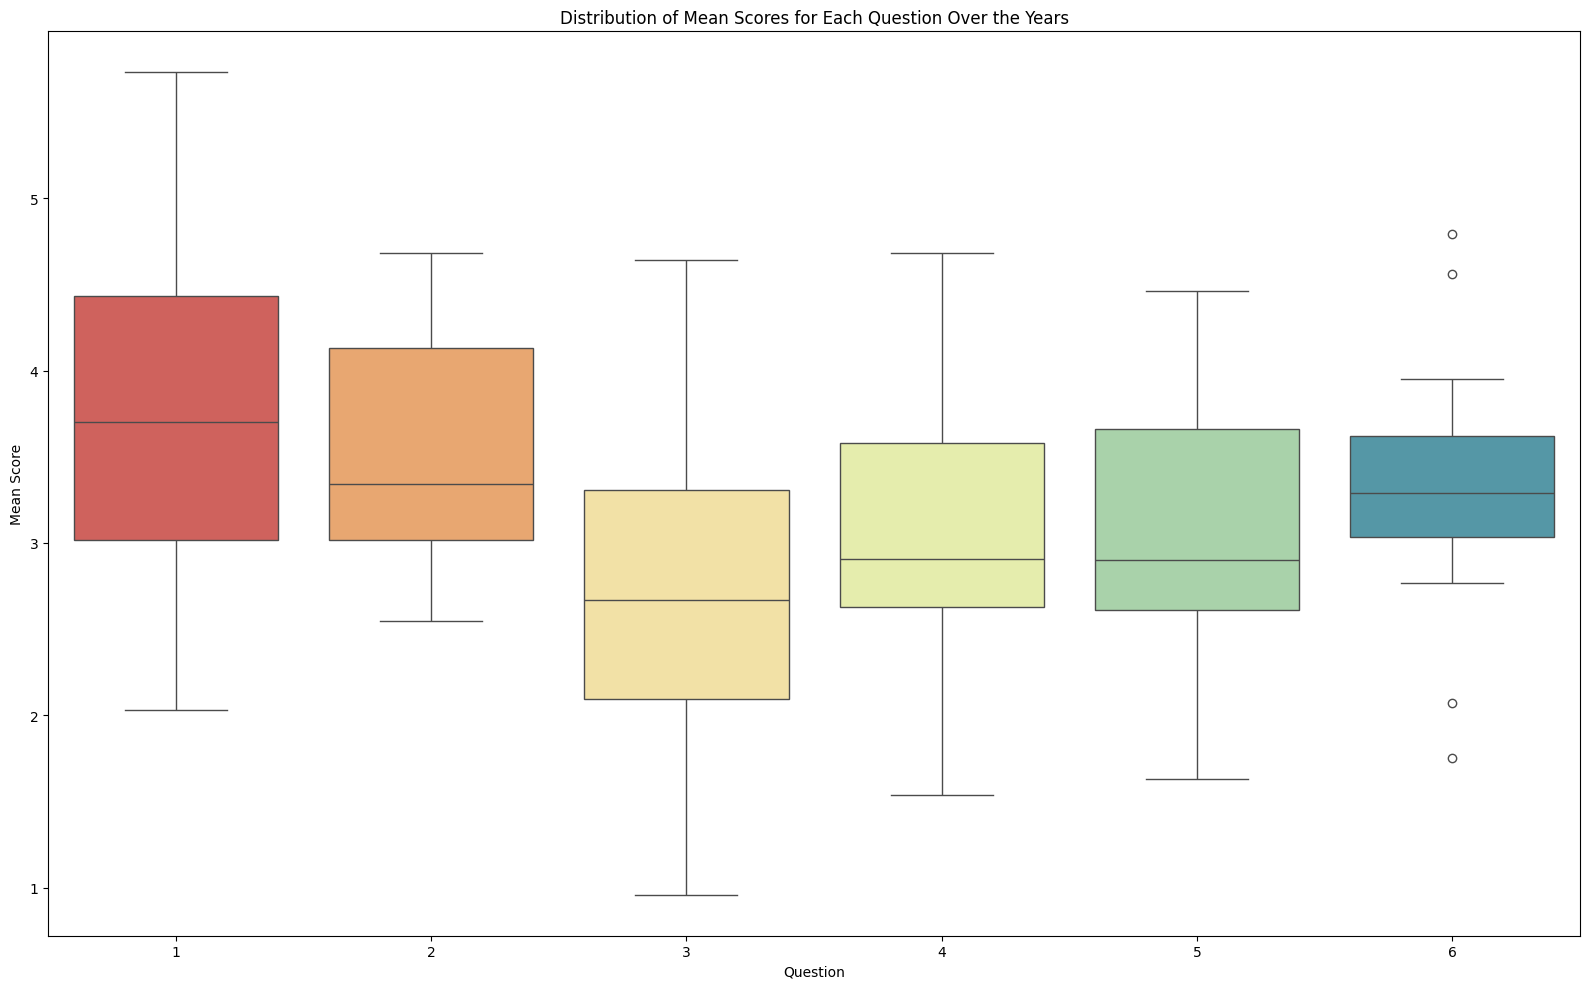

In [8]:
# Setting up the figure size and layout
plt.figure(figsize=(16, 10))

# Creating box plots for the distribution of mean scores for each question over the years
sns.boxplot(data=data, x='Question', y='Mean', palette='Spectral')

plt.title('Distribution of Mean Scores for Each Question Over the Years')
plt.xlabel('Question')
plt.ylabel('Mean Score')

# Display the plot
plt.tight_layout()
plt.show()


The box plots above illustrate the distribution of mean scores for each question over the years. Each box plot represents a different question, with the central line in each box indicating the median score, the box edges representing the first and third quartiles, and the whiskers extending to show the range of the data, excluding outliers.

From these plots, you can observe:

- The variation in median scores across questions, which can indicate the relative difficulty of each question.
- The spread of scores (interquartile range) for each question, showing how consistently students performed.
- Outliers, if any, which could indicate years where the question was particularly difficult or easy compared to other years.

This visualization helps identify which questions have been consistently challenging or easier for students over time and the stability of question difficulty across years.

The insights drawn from the box plot visualization can provide valuable information about the performance trends and variability in scores for each question over the years:

1. General Difficulty of Question 3: You're correct in observing that Question 3 appears to be the hardest on average, as indicated by its lower median scores compared to other questions. This suggests that students generally score less on this question, making it more challenging.

2. Easiness of Question 1: The higher median scores and the position of the box for Question 1 indicate it's generally easier for students. The higher scores suggest that most students were able to secure a good number of points on this question.

3. Median Near the Bottom for Questions 2, 4, and 5: When the median line is closer to the bottom of the box (as seen for Questions 2, 4, and 5), it indicates that a larger proportion of scores are clustered towards the lower end of the middle 50% of the data. This could mean that while some students scored well, a significant portion found these questions relatively more challenging, dragging the median down.

4. Consistency of Question 6: The short box for Question 6 suggests low variability in scores, meaning students' performances on this question are quite consistent year over year. A shorter box implies that the first quartile (25th percentile) and the third quartile (75th percentile) are close together, indicating that most students scored within a narrow range. This could be interpreted as the question having a clear and well-understood set of expectations or that it taps into well-established knowledge or skills.

5. Variability in Other Questions: For Questions 2, 4, and 5, where the boxes are taller, there is greater variability in student scores. This means there's a wider spread in how students perform on these questions, possibly due to differences in how well students understand the topics these questions cover, or the questions might be more open to interpretation, leading to a broader range of scores.

6. Outliers: Outliers, represented by individual points outside the whiskers, indicate years where the mean scores for a question were exceptionally high or low compared to other years. These could point to years where the question was unusually difficult or easy, or where external factors might have affected student performance.

Overall, the box plots suggest that while some questions have relatively consistent levels of difficulty and student performance, others show more variability, potentially indicating areas where curriculum or instruction could be targeted for improvement.

## Correlation Analysis

Analyzing the relationships between the scores of different questions within the same year to see if performance on one question is related to performance on another.

For the correlation analysis, we'll examine the relationships between the scores of different questions within the same year. This involves calculating correlation coefficients for each pair of questions to see how scores on one question are related to scores on another. A positive correlation coefficient indicates that higher scores on one question are associated with higher scores on another, suggesting a potential relationship in the skills or knowledge tested by those questions. A negative correlation would suggest an inverse relationship.

Since we're dealing with aggregate data (mean scores for each question per year), we'll need to reshape the data so that each year's scores for all questions are in a single row. Then, we'll calculate the correlation matrix for these annual score profiles.

Let's start by reshaping the data and then proceed to calculate and visualize the correlation matrix.

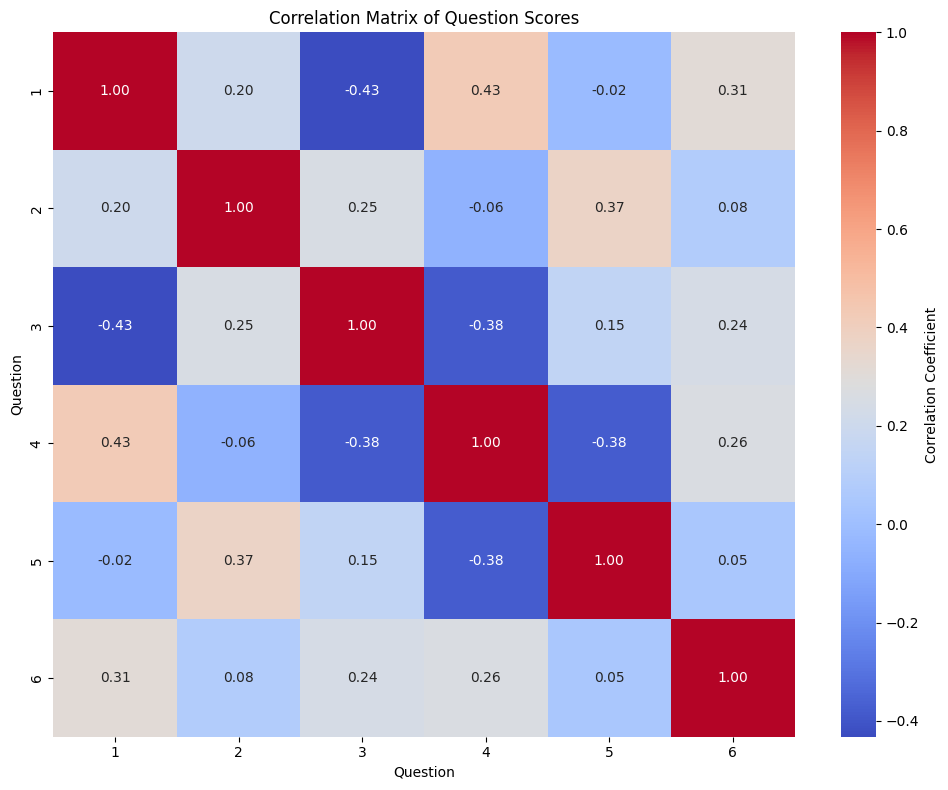

In [9]:

# Reshape the data so that each year's scores for all questions are in a single row
data_pivoted = data.pivot(index='Year', columns='Question', values='Mean')

# Calculate the correlation matrix
correlation_matrix = data_pivoted.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Question Scores')
plt.xlabel('Question')
plt.ylabel('Question')

plt.tight_layout()
plt.show()
    

The heatmap above displays the correlation matrix of question scores, showing how scores on one question are related to scores on others within the same year. Each cell in the matrix represents the correlation coefficient between two questions, with values ranging from -1 to 1:

Positive Correlations (Red): Values closer to 1 indicate a strong positive correlation, meaning that higher scores on one question are associated with higher scores on another. This could suggest that these questions test similar skills or knowledge areas, or that students who are well-prepared in one area tend to do well in others too.

Negative Correlations (Blue): Values closer to -1 indicate a strong negative correlation, meaning that higher scores on one question are associated with lower scores on another. This is less common in educational data but could occur if questions test very different skills that are not often strong in the same students.

Near-Zero Correlations: Values close to 0 indicate little to no linear relationship between scores on the two questions.

The heatmap provides a visual overview of how question performances are interrelated. Strong positive correlations across most questions could indicate a generally consistent level of preparation or ability among students, while varied correlations might suggest that different questions are tapping into distinct skill sets or knowledge areas.

This analysis helps in understanding the structure of the exam and student performances, potentially guiding curriculum development or student preparation strategies.

## Conclusions

The correlation matrix above shows how the mean scores for each question are related to one another over different years. Here are some insights and potential strategies for tutoring:

1. **Focus on Fundamental Concepts:**

    - Questions 1 and 4 show a moderate positive correlation (0.43), suggesting they might share underlying concepts or skills. Strengthening students' understanding in these areas could potentially improve scores on both questions.
2. **Address Common Challenges:**
    - Question 3 shows a negative correlation with Questions 1 and 4 (-0.43 and -0.38, respectively), indicating that when scores for Question 3 are lower, scores for Questions 1 and 4 tend to be higher, and vice versa. This might suggest that the skills or knowledge required for Question 3 are distinct from those for Questions 1 and 4. Identifying and addressing the specific challenges of Question 3 could help students who are struggling with it.
3. **Integrate Learning Across Topics:**
    - Question 2 shows a positive correlation with Question 5 (0.37), hinting that these questions may test related skills or knowledge areas. Integrating learning strategies that cover both topics might help improve scores in these areas.
4. **Individualized Focus:**
    - The correlations are not very strong for most pairs of questions, indicating diverse skill sets across the exam. It's important to assess individual students to identify their strengths and weaknesses and tailor the tutoring approach to address their specific needs.
5. **Strategic Review:**
    - For questions with lower correlations to others (like Question 6, which shows relatively low correlations with most questions), a targeted review might be necessary to ensure students understand these potentially isolated topics.

In summary, while the correlations provide some insights into how question scores might be related, the moderate to low values suggest that a broad and well-rounded preparation strategy is essential. Tailoring your tutoring to reinforce fundamental concepts, address specific challenges, and integrate learning across related topics could be effective strategies for helping students improve their exam performance

## Regression Analysis

Performing regression analysis to identify trends in the average scores for each question over the years, and assessing the confidence in these trends with statistical measures.

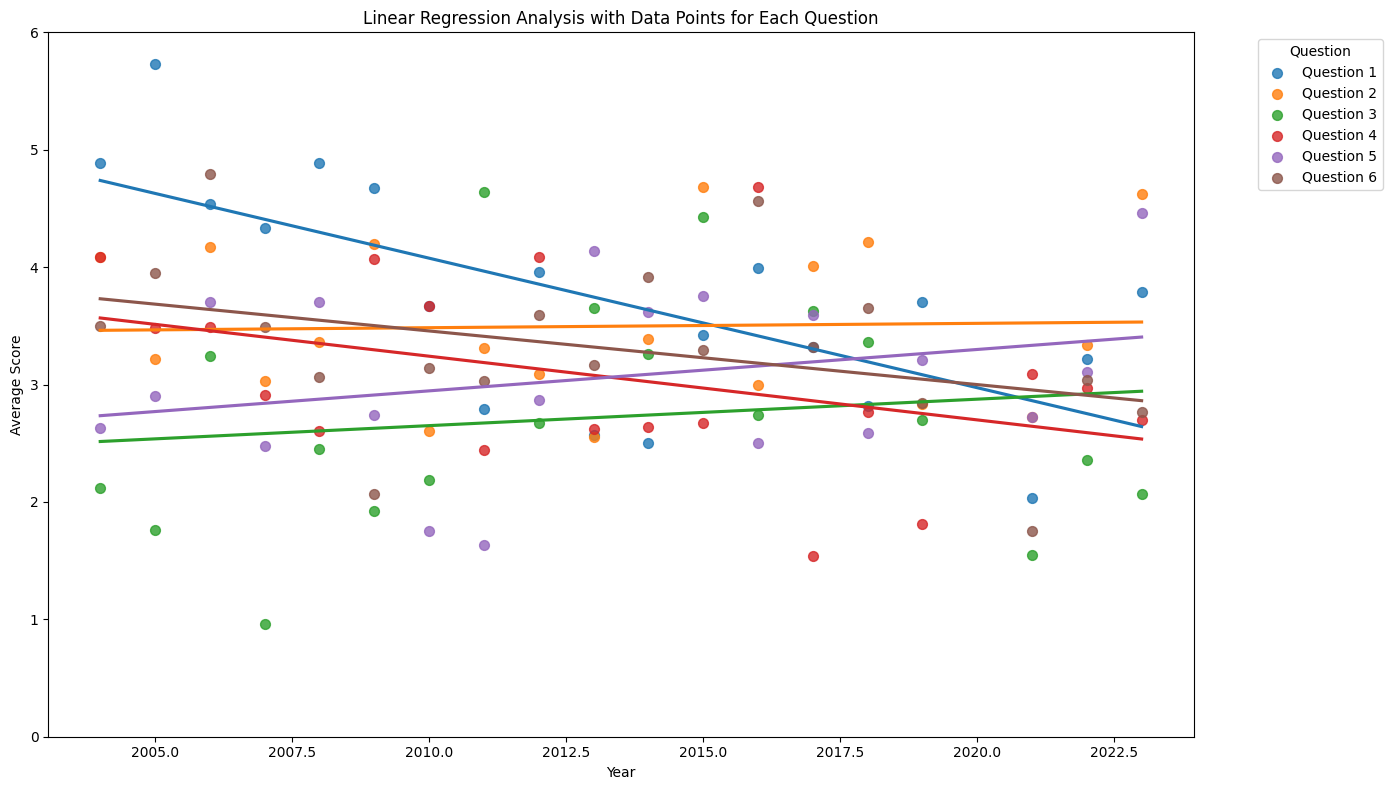

In [10]:
# Plotting linear regression lines for each question along with the actual data points
plt.figure(figsize=(14, 8))

# Loop through each question, plot the regression line and the actual data points
for question in data['Question'].unique():
    question_data = data[data['Question'] == question]
    sns.regplot(data=question_data, x='Year', y='Mean', order=1, ci=None, label=f'Question {question}', scatter_kws={'s':50})

plt.title('Linear Regression Analysis with Data Points for Each Question')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.ylim(0, 6)  # Setting the y-axis limits as requested
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


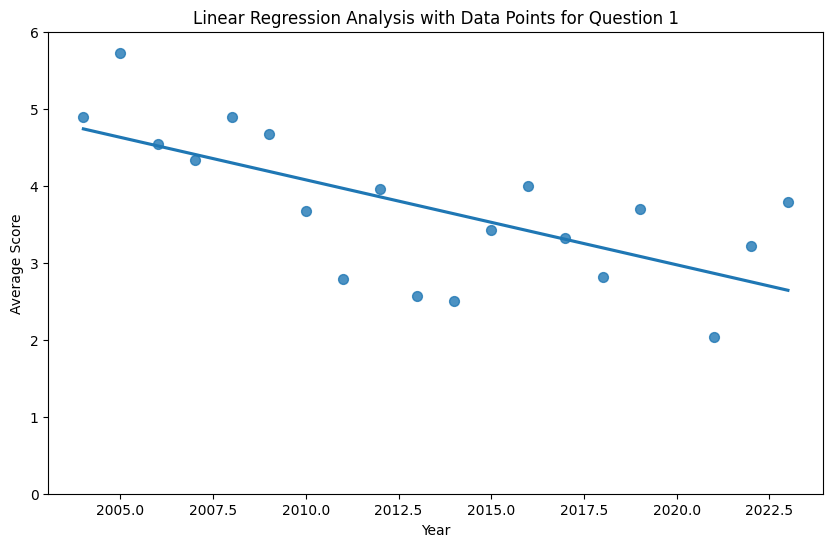

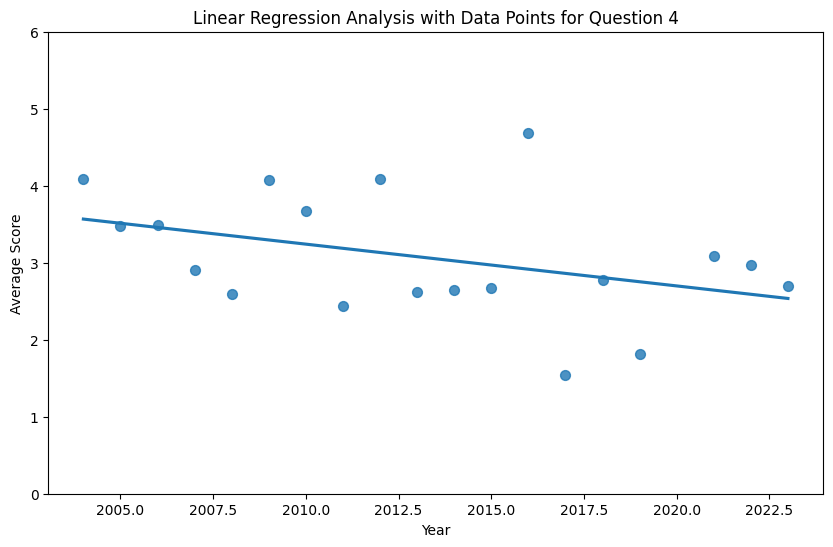

In [11]:

# Function to plot regression analysis with data points for a specific question
def plot_regression_for_question(question_number):
    question_data = data[data['Question'] == question_number]
    plt.figure(figsize=(10, 6))
    sns.regplot(data=question_data, x='Year', y='Mean', order=1, ci=None, scatter_kws={'s':50})
    plt.title(f'Linear Regression Analysis with Data Points for Question {question_number}')
    plt.xlabel('Year')
    plt.ylabel('Average Score')
    plt.ylim(0, 6)  # Setting the y-axis limits
    plt.show()

# Example plots for Question 1 and Question 4
plot_regression_for_question(1)
plot_regression_for_question(4)
    

## Regression Analysis with Statistical Measures

This section performs a regression analysis for each question and provides detailed statistical measures, including R-squared values and p-values, to assess the significance of the trends over time.


In [12]:
from statsmodels.formula.api import ols
import pandas as pd

# List to store regression analysis results
regression_results_list = []

# Perform regression analysis for each question and collect statistics
for question in data['Question'].unique():
    # Subset data for the question
    question_data = data[data['Question'] == question]
    
    # Define the regression formula
    formula = 'Mean ~ Year'
    
    # Fit the linear regression model
    model = ols(formula, data=question_data).fit()
    
    # Extract R-squared value and the p-value for the slope (Year coefficient)
    r_squared = model.rsquared
    slope_p_value = model.pvalues['Year']
    slope_ci_lower, slope_ci_upper = model.conf_int().loc['Year']
    
    # Add the results to the list
    regression_results_list.append({
        'Question': question,
        'R-squared': r_squared,
        'Slope p-value': slope_p_value,
        'Slope CI Lower': slope_ci_lower,
        'Slope CI Upper': slope_ci_upper
    })

# Convert the list to a DataFrame
regression_results = pd.DataFrame(regression_results_list)

# Display the regression analysis results
regression_results


,Question,R-squared,Slope p-value,Slope CI Lower,Slope CI Upper
0,1,0.452212,0.001608,-0.172469,-0.048194
1,2,0.001032,0.896119,-0.055362,0.062783
2,3,0.019024,0.573371,-0.060285,0.105365
3,4,0.155697,0.094559,-0.118917,0.010396
4,5,0.076088,0.253003,-0.027610,0.098124
5,6,0.135683,0.120721,-0.104678,0.013316


To evaluate the confidence in the regression analysis, we can look at several statistical measures that provide insights into the reliability and significance of the regression results. These measures include:

**R-squared (Coefficient of Determination):** This statistic indicates how well the regression line approximates the real data points. An R-squared value close to 1 suggests that the regression line fits the data well, whereas a value close to 0 indicates a poor fit.

**p-values:** The p-value for each regression coefficient tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05 is a common threshold) suggests that we can reject the null hypothesis and that the coefficient is likely different from zero, indicating a significant effect.

**Confidence Intervals:** Confidence intervals for the regression coefficients give a range of values that are likely to contain the true value of the coefficient. Narrow confidence intervals indicate more precise estimates.


The table above presents the statistical measures for the linear regression analysis of each question:

R-squared: Indicates the proportion of the variance in the mean scores that is predictable from the year. Higher values suggest a better fit. For example, Question 1 has an R-squared value of approximately 0.45, indicating that around 45% of the variability in the mean scores can be explained by the year, which is relatively substantial.

Slope p-value: Tests the hypothesis that the slope is zero (no trend). A low p-value suggests that we can reject the null hypothesis and that there is a significant trend. Question 1 has a p-value of about 0.0016, indicating strong evidence against the null hypothesis and suggesting a significant trend in the mean scores over time.

Slope Confidence Interval (CI): Provides a range of plausible values for the slope. If the CI does not include zero, it suggests the slope is significantly different from zero, indicating a trend. For Question 1, the CI ranges from approximately -0.172 to -0.048, not including zero, which supports the significance of the trend.

Based on these measures:

1. Question 1 shows a significant negative trend, with moderate confidence in the regression model (R-squared ~ 0.45), meaning the question might be getting harder over time or students are finding it more challenging.
2. Questions 2, 3, 5, and 6 have high p-values and their CIs include zero, indicating no significant trends in their mean scores over the years. The R-squared values for these questions are also relatively low, suggesting that the year does not explain much of the variance in mean scores.
3. Question 4 is somewhat of a borderline case with a p-value close to the common significance threshold (0.0945) and a somewhat higher R-squared value (~0.16). This might suggest a potential trend, but the evidence is not as strong as for Question 1.

These analyses indicate that while there may be significant trends for some questions (notably Question 1), others do not exhibit strong trends over time, at least not ones that can be confidently captured by a simple linear regression model

### Insights from Regression Analysis:

#### Question 1:
- **R-squared**: 0.452212. Indicates a moderate to strong fit, suggesting about 45% of the variance in scores can be explained by the year.
- **Slope p-value**: 0.001608. Low p-value indicates a statistically significant trend.
- **Confidence Interval for Slope**: (-0.172469, -0.048194). Negative slope with a confidence interval excluding 0 confirms significance.

#### Question 2:
- **R-squared**: 0.001032. Low value suggests year explains little variance in scores; hardly any trend.
- **Slope p-value**: 0.896119. High p-value indicates no statistically significant trend.
- **Confidence Interval for Slope**: (-0.055362, 0.062783). Interval includes 0, suggesting no significant trend.

#### Question 3:
- No significant trend observed.

#### Question 4:
- **R-squared**: 0.155697. Weak relationship between year and scores; slight trend.
- **Slope p-value**: 0.094559. Close to 0.05 significance level, potential trend but not significant.
- **Confidence Interval for Slope**: (-0.118917, 0.010396). Interval includes 0, no conclusive significant trend.

#### Questions 5 and 6:
- Low R-squared values and non-significant p-values. Confidence intervals include 0, suggesting no significant trends.

### Insights for Tutoring:
- **Focus on Fundamentals**: Address significant negative trend in Question 1 by reinforcing foundational concepts.
- **Individualized Approach**: Tailor tutoring based on each student's strengths and weaknesses across different topics.
- **Review of Curriculum**: Review teaching methods for Question 1 to identify potential areas for improvement.


# Random Forest Regression Analysis

Random Forest Regression is a powerful ensemble learning technique used for regression tasks. It builds multiple decision trees and combines their predictions to improve overall performance. Here's how you can implement Random Forest Regression using Python's scikit-learn library:

1. **Data Preparation**:
   - Define features (X) and target variable (y).
   - Split the data into training and testing sets.

2. **Model Training**:
   - Initialize the Random Forest Regression model with desired parameters (e.g., number of trees).
   - Train the model using the training data.

3. **Model Evaluation**:
   - Make predictions on the testing set.
   - Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R2).

Random Forest Regression provides a robust method for predicting scores based on historical data. You can adjust hyperparameters and explore more advanced techniques to further optimize the model's performance.


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = data[['Year']].values
y = data['Mean'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 0.99
R-squared (R2): -0.68


### Random Forest Regression Results:

- **Mean Squared Error (MSE)**: 0.99
  - The MSE is a measure of the average squared difference between the predicted scores and the actual scores. A lower MSE indicates better performance. In this case, a MSE of 0.99 suggests that the model's predictions are quite far off from the actual scores.

- **R-squared (R2)**: -0.68
  - The R-squared value measures the proportion of the variance in the target variable (average scores) that is explained by the independent variable (year) in the model. Negative R2 values indicate that the model performs worse than a horizontal line representing the mean of the target variable. In this case, the negative R2 suggests that the model's predictions are not useful and might even be worse than random guessing.

Overall, these results indicate that the Random Forest Regression model does not perform well in predicting the average scores of questions based on the year. Further exploration and refinement of the model may be necessary to improve its performance.


# Gradient Boosting Regression Analysis

Gradient Boosting Regression is an ensemble learning technique that builds a sequence of decision trees, where each tree corrects the errors of the previous one. It typically yields strong predictive performance and is commonly used for regression tasks. Here's how you can implement Gradient Boosting Regression using Python's scikit-learn library:

1. **Data Preparation**:
   - Define features (X) and target variable (y).
   - Split the data into training and testing sets.

2. **Model Training**:
   - Initialize the Gradient Boosting Regression model with desired parameters (e.g., number of trees, learning rate).
   - Train the model using the training data.

3. **Model Evaluation**:
   - Make predictions on the testing set.
   - Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R2).

Gradient Boosting Regression provides a robust method for predicting scores based on historical data. You can adjust hyperparameters and explore more advanced techniques to further optimize the model's performance.


In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = data[['Year']].values
y = data['Mean'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 1.02
R-squared (R2): -0.74


### Gradient Boosting Regression Results

The results indicate that the Gradient Boosting Regression model did not perform well on the testing data:

- **Mean Squared Error (MSE)**: 1.02. This value represents the average squared difference between the predicted scores and the actual scores. A lower MSE indicates better model performance, so an MSE of 1.02 suggests some degree of error in the predictions.

- **R-squared (R2)**: -0.74. The R-squared value measures the proportion of the variance in the target variable that is explained by the model. A higher R-squared value closer to 1 indicates better model fit, while negative values suggest that the model performs worse than a horizontal line. In this case, an R2 of -0.74 indicates that the model's predictions are worse than simply using the mean of the target variable.

These results suggest that the Gradient Boosting Regression model may not be suitable for predicting scores based on the given features (in this case, just the 'Year'). Possible reasons for poor performance could include inadequate feature selection, insufficient data, or improper hyperparameter tuning. Further exploration and refinement of the model may be necessary to improve its predictive accuracy.


# Time Series Analysis

Time series analysis is a powerful technique for analyzing data that varies over time. It's commonly used for forecasting future values based on historical patterns and trends. Here's how you can perform time series analysis using Python's statsmodels library:

1. **Data Preparation**:
   - Load the dataset and convert the 'Year' column to datetime format.
   - Set the 'Year' column as the index of the DataFrame.

2. **Data Visualization**:
   - Plot the time series data to visualize the trend and patterns over time.

3. **Time Series Decomposition**:
   - Perform time series decomposition using the `seasonal_decompose` function from statsmodels to separate the time series into trend, seasonal, and residual components.
   - Plot the individual components of the time series decomposition to analyze the trend, seasonal patterns, and residuals.

Time series analysis provides valuable insights into the underlying patterns and trends in the data, which can be used for forecasting future values and making informed decisions.


In [15]:
# Print the column names of the DataFrame
print("Column Names:", data.columns)

# Print the first few rows of the DataFrame
print(data.head())


Column Names: Index(['Year', 'Question', 'Mean', 'Standard Deviation',
       'Number of Possible Points'],
      dtype='object')
   Year  Question  Mean  Standard Deviation  Number of Possible Points
0  2023         1  3.79                2.57                          9
1  2023         2  4.62                3.14                          9
2  2023         3  2.07                2.28                          9
3  2023         4  2.70                2.17                          9
4  2023         5  4.46                3.26                          9


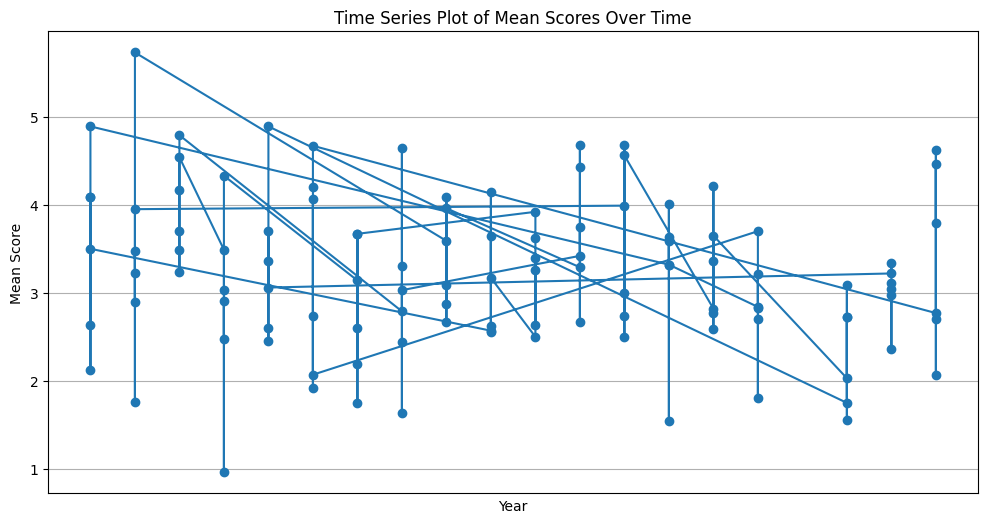

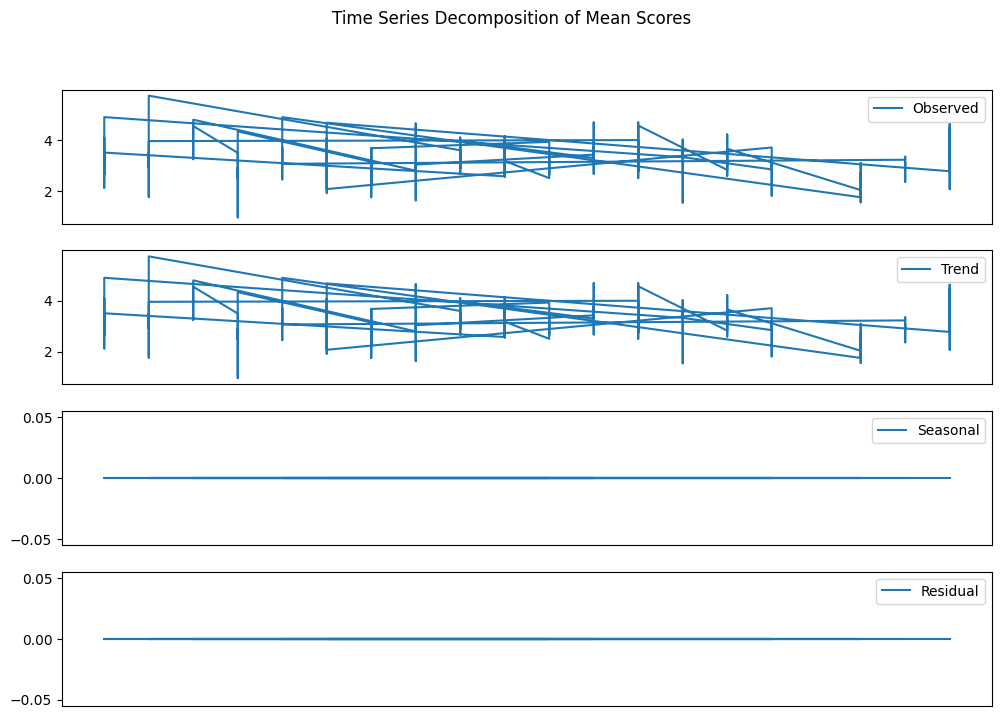

In [16]:
# Load the dataset with 'Year' column as the index
data = pd.read_csv(data_path, index_col='Year')

# Convert the index to datetime format
data.index = pd.to_datetime(data.index)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Mean'], marker='o', linestyle='-')
plt.title('Time Series Plot of Mean Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.grid(True)
plt.show()

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(data['Mean'], model='additive', extrapolate_trend='freq', period=1)

# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data.index, decomposition.observed, label='Observed')
plt.legend()
plt.subplot(412)
plt.plot(data.index, decomposition.trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(data.index, decomposition.seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(data.index, decomposition.resid, label='Residual')
plt.legend()

plt.suptitle('Time Series Decomposition of Mean Scores')
plt.show()


# ARIMA (AutoRegressive Integrated Moving Average) 

This is a popular time series forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components to capture different aspects of time series data.

Here's how you can implement ARIMA modeling in Python using the statsmodels library:

/Users/marcpgoodman/anaconda3/envs/my_new_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/marcpgoodman/anaconda3/envs/my_new_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/marcpgoodman/anaconda3/envs/my_new_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/marcpgoodman/anaconda3/envs/my_new_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it i

                               SARIMAX Results                                
Dep. Variable:                   Mean   No. Observations:                  114
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -146.536
Date:                Fri, 09 Feb 2024   AIC                            299.073
Time:                        00:12:40   BIC                            307.255
Sample:                             0   HQIC                           302.393
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0544      0.120     -0.451      0.652      -0.290       0.182
ma.L1         -1.0000     24.057     -0.042      0.967     -48.152      46.152
sigma2         0.7505     18.025      0.042      0.9

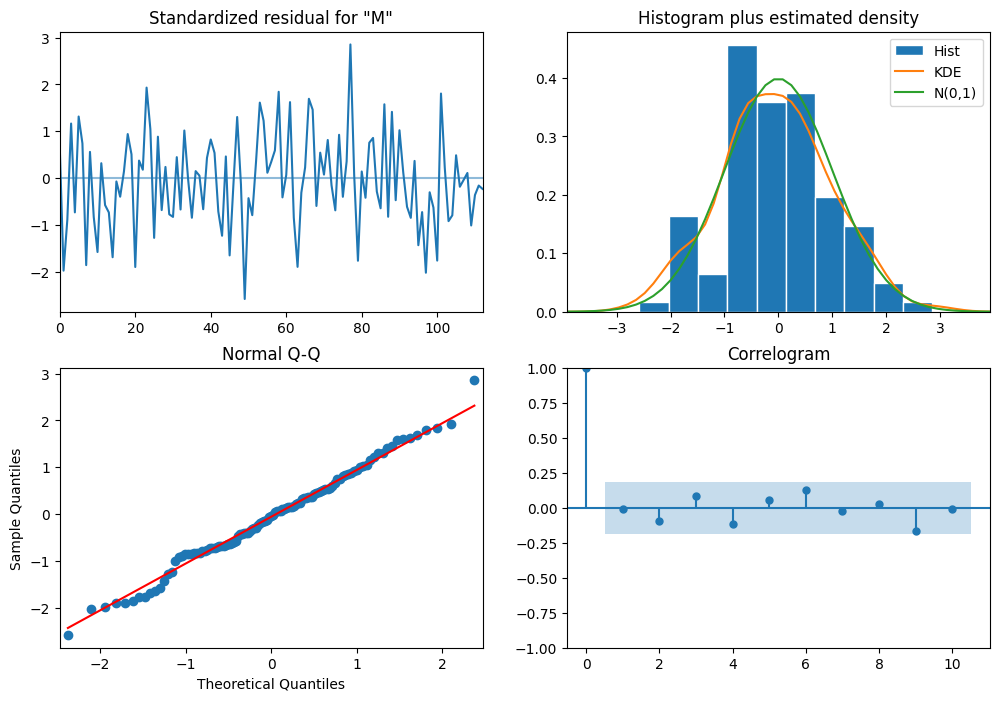

Forecasted values:
114    3.240891
115    3.229972
116    3.230565
117    3.230533
118    3.230535
Name: predicted_mean, dtype: float64


/Users/marcpgoodman/anaconda3/envs/my_new_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/marcpgoodman/anaconda3/envs/my_new_env/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [17]:
# Load the dataset with 'Year' column as the index
data = pd.read_csv(data_path, index_col='Year')

# Convert the index to datetime format
data.index = pd.to_datetime(data.index)

# Fit ARIMA model
model = sm.tsa.ARIMA(data['Mean'], order=(1,1,1))  # ARIMA(p,d,q) with p=1, d=1, and q=1
results = model.fit()

# Print model summary
print(results.summary())

# Plot diagnostics
results.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast future values
forecast_steps = 5  # Number of steps to forecast into the future
forecast = results.forecast(steps=forecast_steps)

# Print forecasted values
print("Forecasted values:")
print(forecast)


1. **Load the dataset**: Load the dataset with the 'Year' column as the index and convert the index to datetime format.

2. **Fit ARIMA model**: Fit an ARIMA model with order (1,1,1), which means one autoregressive (AR) term, one differencing (I) term, and one moving average (MA) term.

3. **Print model summary**: Print the summary of the model to examine the coefficients and statistical information.

4. **Plot diagnostics**: Plot the diagnostics of the model to check for any patterns or anomalies in the residuals.

5. **Forecast future values**: Forecast future values using the trained ARIMA model for the specified number of steps into the future.

6. **Print forecasted values**: Print the forecasted values for the specified number of steps into the future.


# K-means Clustering

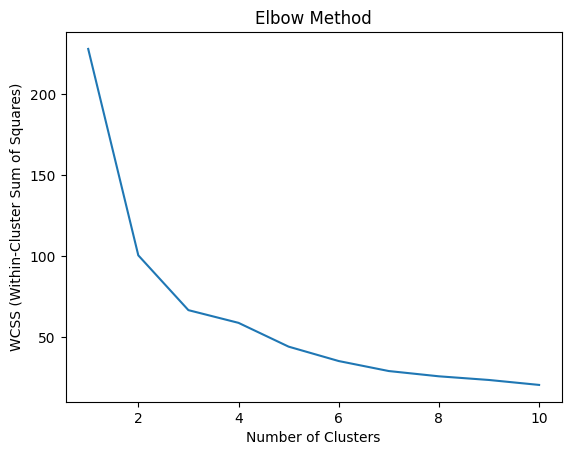

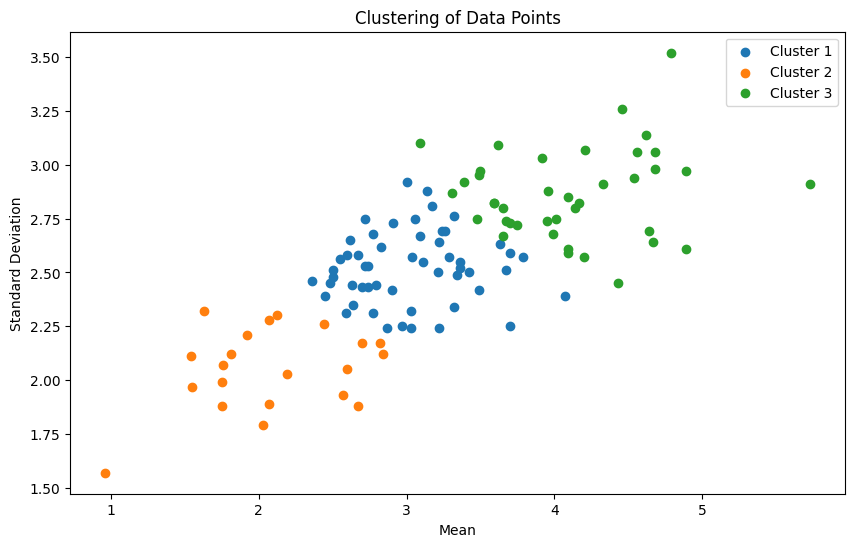

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv(data_path)

# Select relevant features for clustering (e.g., 'Mean', 'Standard Deviation')
features = ['Mean', 'Standard Deviation']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
k = 3  # for example

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Mean'], cluster_data['Standard Deviation'], label=f'Cluster {cluster+1}')
plt.title('Clustering of Data Points')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


1. **Load the dataset**: Load the dataset and select relevant features for clustering.
   
2. **Standardize the features**: Use StandardScaler to standardize the features to ensure that all variables contribute equally to the clustering process.

3. **Apply PCA (optional)**: Optionally, apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. This step is beneficial when dealing with high-dimensional data.

4. **Determine the optimal number of clusters**: Use the Elbow method to determine the optimal number of clusters. The Elbow method helps identify the point where the within-cluster sum of squares (WCSS) starts to decrease at a slower rate, indicating the optimal number of clusters.

5. **Perform K-means clustering**: Perform K-means clustering with the chosen number of clusters. K-means is a popular clustering algorithm that partitions the data into K clusters based on similarity.

6. **Visualize the clusters**: Visualize the clusters by plotting the data points with different colors corresponding to their assigned clusters. This visualization helps understand how the data points are grouped based on their features.
